# Programming Project 1 analysis using EDA tools

### Import Modules

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd

In [2]:
# Load the dataset and save it to a dataframe named 'df'
df=pd.read_csv('timesheet.csv')
df.head()

,Initials,Date,Course ID,Time,Summary
0,CS,1/11/23,BUSA-301,60,Read chapter one and take notes
1,CS,1/12/23,BUSA-301,45,Week 1 Participation
2,CS,1/14/23,DS-160,60,In Class Assignment - Arrest Data
3,CS,1/14/23,BUSA-245,60,Read chapter one and take notes
4,CS,1/16/23,BUSA-245,60,Read chapter two and take notes


### Investigate your dataset using pandas modules and do the tasks. At the end the dataframe will be look like: 
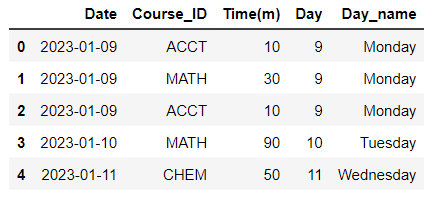

In [3]:
df.head()

,Initials,Date,Course ID,Time,Summary
0,CS,1/11/23,BUSA-301,60,Read chapter one and take notes
1,CS,1/12/23,BUSA-301,45,Week 1 Participation
2,CS,1/14/23,DS-160,60,In Class Assignment - Arrest Data
3,CS,1/14/23,BUSA-245,60,Read chapter one and take notes
4,CS,1/16/23,BUSA-245,60,Read chapter two and take notes


In [4]:
df.sample(10)

,Initials,Date,Course ID,Time,Summary
29,CS,2/13/23,BUSA-245,60,Read chapter 5 and take notes
3,CS,1/14/23,BUSA-245,60,Read chapter one and take notes
15,CS,1/31/23,ACCT-212,60,Read chapter 12 and take notes
19,CS,2/2/23,ACCT-212,30,Studied for Exam 1
6,CS,1/19/23,ACCT-212,60,Read chapter 9 and take notes
25,CS,2/8/23,BUSA-245,60,Worked on Labs
13,CS,1/26/23,DS-160,30,Began Individual Project 3
24,CS,2/7/23,BUSA-301,60,Read chapter 6 and take notes
21,CS,2/5/23,BUSA-301,60,Chapter 4 Participation Powerpoint
23,CS,2/6/23,BUSA-245,30,Finished last week labs


In [5]:
df.columns

Index(['Initials', 'Date', 'Course ID', 'Time', 'Summary'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Initials   31 non-null     object
 1   Date       31 non-null     object
 2   Course ID  31 non-null     object
 3   Time       31 non-null     int64 
 4   Summary    31 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.3+ KB


In [7]:
# Is there any column you want to drop? If yes which column and why?

df.drop(['Initials', 'Summary'], axis=1, inplace=True)

Drop 'Summary' and 'Initials' - all of the initials are mine so the information is redundant and unnecessary 
summary has a lot words that are unneeded for analysis

In [8]:
# Convert the date column to datetime
df['Date']=pd.to_datetime(df['Date'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       31 non-null     datetime64[ns]
 1   Course ID  31 non-null     object        
 2   Time       31 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 872.0+ bytes


In [10]:
# Calculate the day of the month and create a new column named 'Day'
df['Day']=df['Date'].dt.day

In [11]:
# Create a new column called Day_name using  .dt.day_name()
df['Day_Name']=df['Date'].dt.day_name()

In [12]:
df.head()

,Date,Course ID,Time,Day,Day_Name
0,2023-01-11,BUSA-301,60,11,Wednesday
1,2023-01-12,BUSA-301,45,12,Thursday
2,2023-01-14,DS-160,60,14,Saturday
3,2023-01-14,BUSA-245,60,14,Saturday
4,2023-01-16,BUSA-245,60,16,Monday


### Answer the questions

In [13]:
# What is the average time you have spend for learning?
df.describe()

,Time,Day
count,31.000000,31.000000
mean,61.774194,14.032258
std,36.777448,8.769203
min,30.000000,1.000000
25%,52.500000,6.500000
50%,60.000000,13.000000
75%,60.000000,22.500000
max,240.000000,31.000000


According to the mean of the Time column, I spend 61.774194 minutes on learning. 

In [14]:
# Display all of the entries where you have spent more than the average time to learn 
df.query('Time>61.774194')

,Date,Course ID,Time,Day,Day_Name
20,2023-02-05,ACCT-212,240,5,Sunday
27,2023-02-12,ACCT-441,120,12,Sunday


In [15]:
# Which course you have spent the maximum time to prepare?
df.groupby('Time').max()

,Date,Course ID,Day,Day_Name
Time,,,,
30,2023-02-06,DS-160,26,Wednesday
40,2023-01-30,DS-160,30,Monday
45,2023-01-23,DS-160,23,Thursday
60,2023-02-13,DS-160,31,Wednesday
120,2023-02-12,ACCT-441,12,Sunday
240,2023-02-05,ACCT-212,5,Sunday


As shown through comparison of the max inputs for Time, ACCT 212 is the course I have spent the maximum time to prepare. 

In [16]:
# Which day of the week you sepent most of the time?
df.groupby('Day_Name').sum()

,Time,Day
Day_Name,,
Monday,415,130
Saturday,180,39
Sunday,525,56
Thursday,225,61
Tuesday,300,103
Wednesday,270,46


According to the chart, I spend the most time studying on Sundays with a total of 525 minutes. 

### Investigate the distribution of Time, adding the mean. How the data distributed?
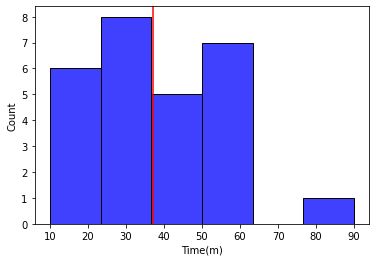

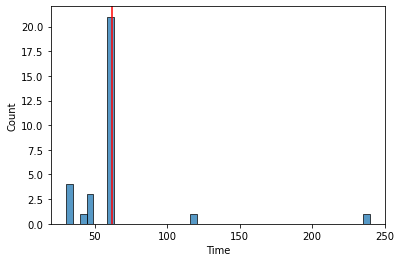

In [17]:
hist_plot=sns.histplot(x='Time', data=df)

mean=df['Time'].mean()

plt.axvline(mean, color='red')

plt.show()

Distribution is skewed right

### Investigate Total time by Day using bar plot - Remove the Confidence Interval - By Course ID. Comment on your findings
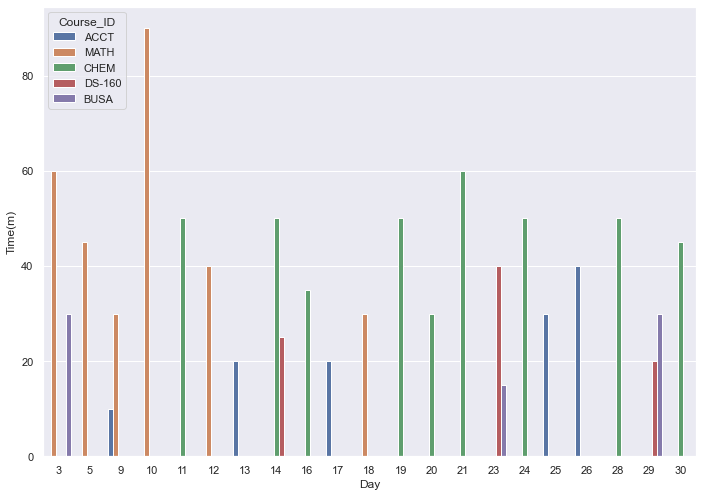

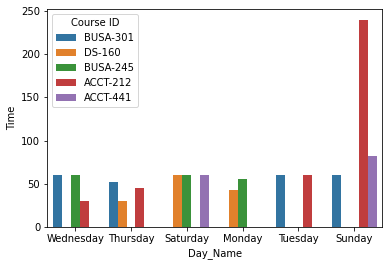

In [18]:
bar_plot=sns.barplot(x='Day_Name', y='Time', data=df, ci=False, hue='Course ID')

I spend around an hour for each class - there's no distinct pattern for when I study for a class (not more likely to study one day than the other) 

### Investigate the measure of dispersion (table and plot) of time column.
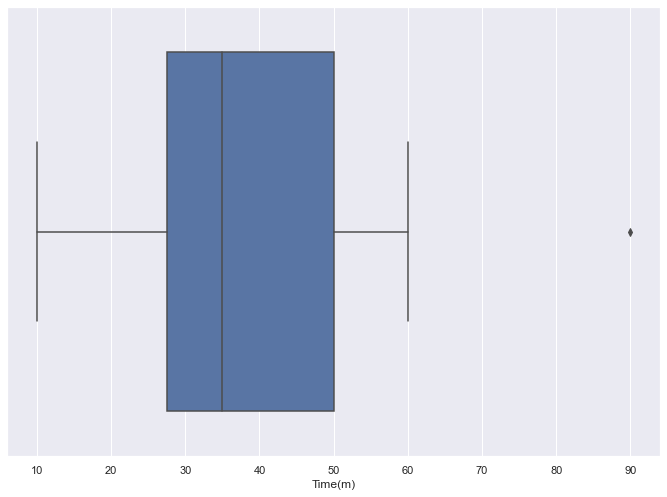

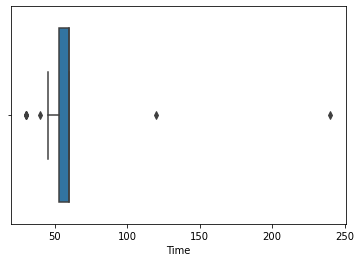

In [19]:
box_plot=sns.boxplot(x='Time', data=df)

I have two obvious outliers (120 and 540) - almost all of my data is at 60 minutes 

### Investigate the the distribution of time by Day_name
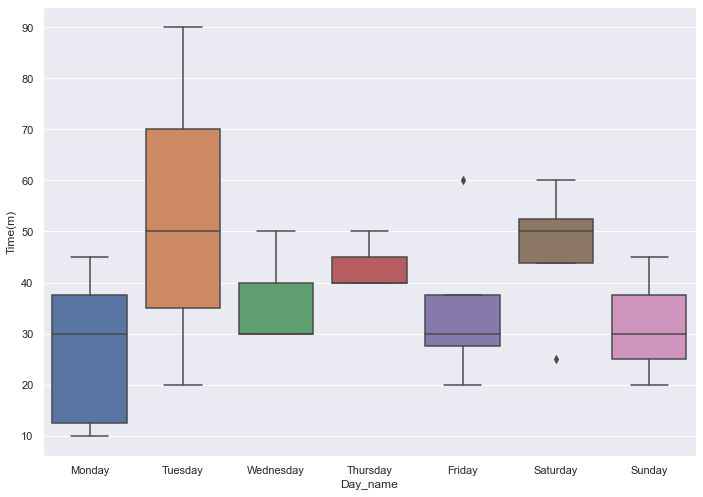

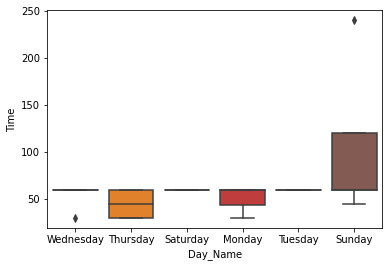

In [20]:
box_plot=sns.boxplot(x='Day_Name', y='Time', data=df)

On Wednesday, Saturday, and Tuesday, I only spend 60 minutes on work, creating no dispersion for the box plot. For Thursday and Monday, I spend 60 minutes and less on work, creating small dispersion. Sunday features the most typical box plot with some dispersion and an outlier. 

### Use lmplots to plot Day and Time , remove error bar, add hue and display by column
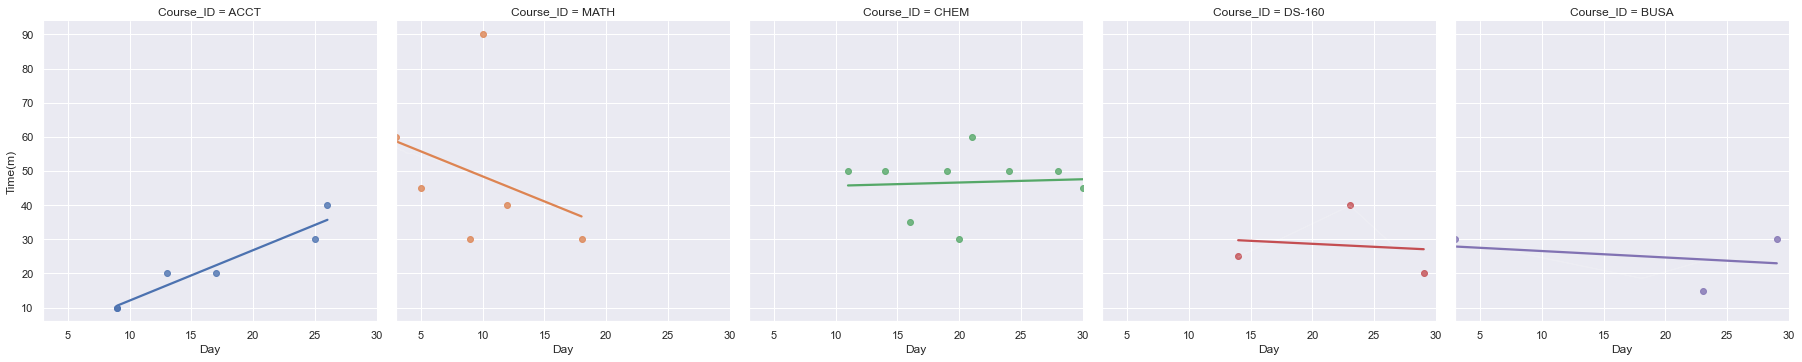

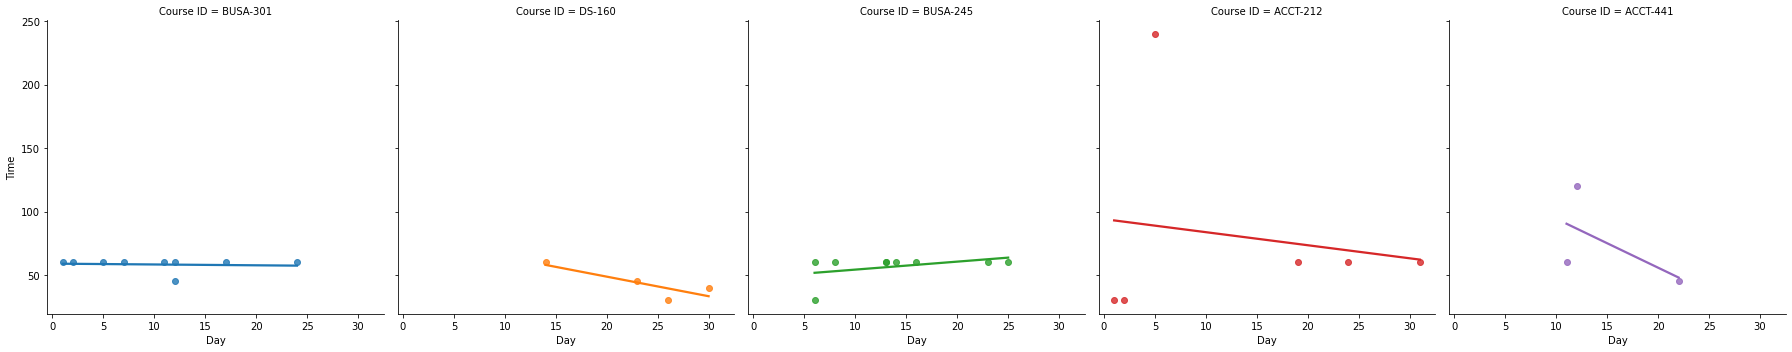

In [23]:
lm_plot=sns.lmplot(x='Day', y='Time', data=df, hue='Course ID', ci=False, col='Course ID')

### Create a pair plot of Day and Time and add course id as hue
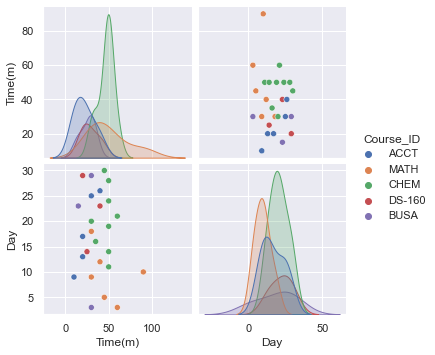

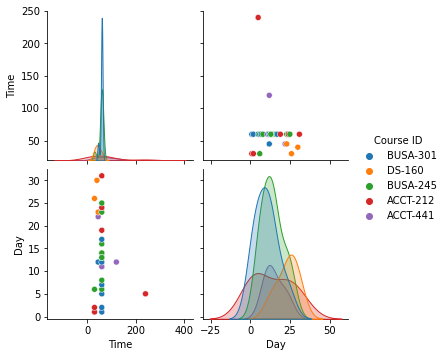

In [25]:
pair_plot=sns.pairplot(df, hue='Course ID')

### Display the Heatmap and comment on your findings
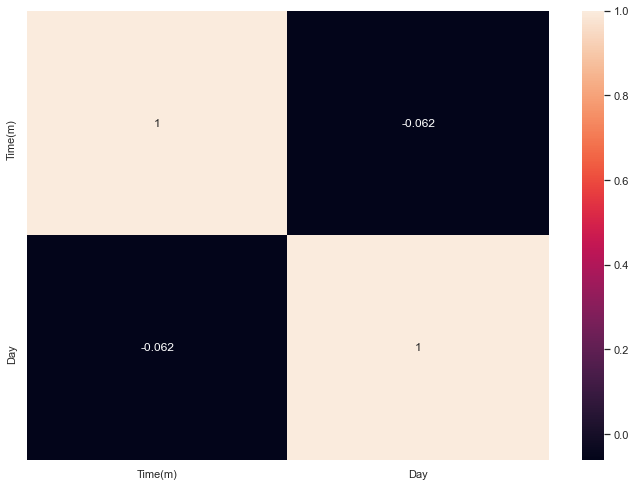

          Time       Day
Time  1.000000 -0.171238
Day  -0.171238  1.000000


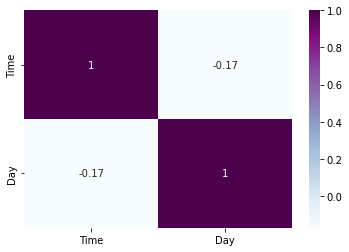

In [26]:
heat_map_corr=df[['Time', 'Day']].corr(method='pearson')
print(heat_map_corr)

cols=['Time', 'Day']

heat_map=sns.heatmap(heat_map_corr, annot=True, xticklabels=cols, yticklabels=cols, cmap='BuPu')

With a -0.17, Day and Time are not correlated for my study habits. 